## Comparing the clean and incremental build time of a system on its different configurations

In [1]:
import pandas as pd
import numpy as np

# Will show the clean build time and the executable's binary size for all system's configurations
path = '/home/xternava/Documents/GitHub/Incremental-build/data/rez_sample_04I/'
#path = '/src/data/'
df1 = pd.read_csv(path + 'clean-bt.csv', converters={'BranchC': lambda x: str(x)})
df2 = pd.read_csv(path + 'incremental-bt.csv', converters={'Br2': lambda x: str(x)})

df1 = df1.rename(columns = {"BranchC": "Branch", "Build Time": "Clean Build Time"})
df2 = df2.rename(columns = {"Br2": "Branch", 
                            "max": "Max Inc. Build Time", 
                            "mean": "Mean Inc. Build Time",
                            "min": "Min Inc. Build Time"})
df3 = pd.merge(df1, df2) 
df3.round(decimals=2)


,Branch,Clean Build Time,Binary Size,Max Inc. Build Time,Mean Inc. Build Time,Min Inc. Build Time
0,00001,60.91,9648880,23.12,12.13,0.01
1,00002,65.66,10173424,25.65,13.46,0.01
2,00003,68.21,9699272,30.31,15.90,0.01
3,00004,68.48,10199640,28.91,15.11,0.01
4,00005,68.24,10147616,28.72,15.08,0.01
5,00006,72.30,10201208,70.50,45.76,0.01
6,00007,56.79,8464736,23.34,12.23,0.01
7,00008,59.18,8528944,25.86,13.56,0.01
8,00009,72.45,10190120,32.74,17.13,0.01
9,00010,71.44,10106296,32.06,16.82,0.01


In [2]:
df2['Time Diff. %'] = (1 - (df2['Min Inc. Build Time'] / df1['Clean Build Time'])) * 100
df4 = pd.merge(df1[["Branch", "Clean Build Time"]], 
                df2[["Branch", "Min Inc. Build Time", "Time Diff. %"]]) 
df4 = df4.round(decimals=2).sort_values(by = "Time Diff. %", ascending=False)

df4

,Branch,Clean Build Time,Min Inc. Build Time,Time Diff. %
0,00001,60.91,0.01,99.99
9,00010,71.44,0.01,99.99
18,00019,72.30,0.01,99.99
16,00017,67.63,0.01,99.99
14,00015,62.60,0.01,99.99
13,00014,70.72,0.01,99.99
11,00012,68.40,0.01,99.99
1,00002,65.66,0.01,99.99
10,00011,68.10,0.01,99.99
8,00009,72.45,0.01,99.99


In [3]:
# Extracting only the first and last 5 extreme differences in build time
#df5 = df4[: 5]
#df6 = df4[-5:]
#df7 = df5.append(df6)
#df7

df5 = df4.set_index(["Branch"])
df5

,Clean Build Time,Min Inc. Build Time,Time Diff. %
Branch,,,
00001,60.91,0.01,99.99
00010,71.44,0.01,99.99
00019,72.30,0.01,99.99
00017,67.63,0.01,99.99
00015,62.60,0.01,99.99
00014,70.72,0.01,99.99
00012,68.40,0.01,99.99
00002,65.66,0.01,99.99
00011,68.10,0.01,99.99


<AxesSubplot:xlabel='Configurations', ylabel='Difference of build time'>

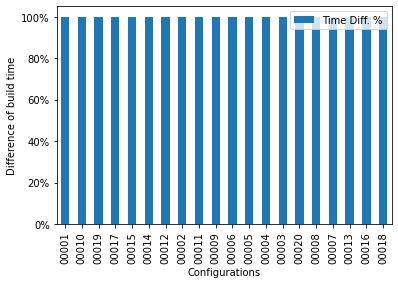

In [4]:
# Visualized the minimum, maxium, and average incremental build time for all configurations
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


ib_plot = df5[["Time Diff. %"]].plot(kind='bar')


ib_plot.set_xlabel("Configurations")
ib_plot.set_ylabel("Difference of build time")

ib_plot.yaxis.set_major_formatter(mtick.PercentFormatter())
ib_plot.xaxis.tick_bottom()

#ib_plot.tight_layout(pad=1.0)
plt.savefig("./figures/fig03.pdf", bbox_inches = 'tight', pad_inches = 0)

ib_plot

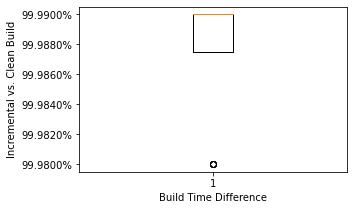

In [5]:
# The clean and incremental build time summaried for all configurations in %
import matplotlib.pyplot as plt
 
all_data1 = df5['Time Diff. %']
labels1 = "Build Time Difference"
     
plt.rc('font', size=10)

fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))

#ax1.violinplot(all_data1)
ax1.boxplot(all_data1)
ax1.set_xlabel(labels1)
ax1.set_ylabel("Incremental vs. Clean Build")

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())

fig.tight_layout(pad=1.0)
plt.savefig("./figures/fig05.pdf", bbox_inches = 'tight', pad_inches = 0)

plt.show()